In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data_info = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
data_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
data_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz') 
data_reviews = pd.read_csv('data/zippedData/rotten_tomatoes_critic_reviews.csv.gz')
data_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')


In [2]:
new_movie = data_info.loc[:,('movie_title','critics_consensus','actors','production_company','tomatometer_status','tomatometer_rating','audience_rating','tomatometer_rotten_critics_count')]

new_movie.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19


In [3]:
movie_overview=pd.merge(new_movie,data_budgets,how='inner',left_on='movie_title',right_on='movie')

movie_overview.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,17,"Feb 12, 2010",Percy Jackson & the Olympians: The Lightning T...,"$95,000,000","$88,768,303","$223,050,874"
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,15,"Apr 30, 2010",Please Give,"$3,000,000","$4,033,574","$4,570,178"


In [4]:
movie_overview2 = pd.merge(movie_overview,data_movies, how='inner', left_on='movie_title',right_on='title')
movie_overview_final = movie_overview2.drop(['genre_ids','original_title','title','original_language','release_date_x','id_x','movie','domestic_gross'], axis = 1)

movie_overview_final_drop = movie_overview_final.dropna()
movie_overview_final_drop

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
2,Criminal,"If you saw Nine Queens, it may feel redundant,...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",Warner Bros. Pictures,Fresh,69.0,57.0,39,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
5,Going the Distance,It's timelier and a little more honest than mo...,"Drew Barrymore, Justin Long, Charlie Day, Jaso...",New Line Cinema,Rotten,54.0,52.0,77,"$32,000,000","$43,603,990",38073,8.281,2010-09-03,6.0,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,"$85,000,000","$83,080,084",285135,4.180,2014-08-16,3.8,49
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,"$80,000,000","$170,805,525",38317,10.764,2011-07-08,5.3,886
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,"$50,000,000","$55,348,693",329833,12.997,2016-02-12,4.7,1374
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,"$35,000,000","$12,506,188",351065,3.434,2016-09-02,5.5,43


In [5]:
movie_overview_final_drop.shape

(2060, 15)

In [6]:
movie_overview_final_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       2060 non-null   object 
 1   critics_consensus                 2060 non-null   object 
 2   actors                            2060 non-null   object 
 3   production_company                2060 non-null   object 
 4   tomatometer_status                2060 non-null   object 
 5   tomatometer_rating                2060 non-null   float64
 6   audience_rating                   2060 non-null   float64
 7   tomatometer_rotten_critics_count  2060 non-null   int64  
 8   production_budget                 2060 non-null   object 
 9   worldwide_gross                   2060 non-null   object 
 10  id_y                              2060 non-null   int64  
 11  popularity                        2060 non-null   float64
 12  releas

In [7]:
movie_no_duplicates = movie_overview_final_drop.drop_duplicates(subset=['movie_title'], keep='last')
movie_no_duplicates

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
5,Going the Distance,It's timelier and a little more honest than mo...,"Drew Barrymore, Justin Long, Charlie Day, Jaso...",New Line Cinema,Rotten,54.0,52.0,77,"$32,000,000","$43,603,990",38073,8.281,2010-09-03,6.0,394
9,Moonlight,Moonlight uses one man's story to offer a rema...,"Naomie Harris, André Holland, Mahershala Ali, ...",A24 Films,Certified-Fresh,98.0,79.0,7,"$1,500,000","$65,245,512",376867,15.948,2016-10-21,7.4,3893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,"$85,000,000","$83,080,084",285135,4.180,2014-08-16,3.8,49
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,"$80,000,000","$170,805,525",38317,10.764,2011-07-08,5.3,886
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,"$50,000,000","$55,348,693",329833,12.997,2016-02-12,4.7,1374
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,"$35,000,000","$12,506,188",351065,3.434,2016-09-02,5.5,43


In [8]:
production_company = movie_no_duplicates.value_counts(['production_company'],ascending=False)
production_company

production_company       
Universal Pictures           122
Warner Bros. Pictures        117
20th Century Fox             112
Paramount Pictures            82
Sony Pictures                 80
                            ... 
Yari Film Group                1
Monterey Media                 1
Turner Home Entertainment      1
Millenium Films                1
s                              1
Length: 288, dtype: int64

In [9]:
production_budget = movie_no_duplicates.sort_values(by=['production_budget'],ascending=False)
production_budget

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
2227,The Peanuts Movie,The Peanuts Movie offers a colorful gateway in...,"Noah Schnapp, Hadley Belle Miller, Alexander G...",20th Century Fox,Certified-Fresh,87.0,76.0,25,"$99,000,000","$250,091,610",227973,11.344,2015-11-01,6.6,894
229,Robin Hood,"Robin Hood robs from rich source material, but...","Taron Egerton, Eve Hewson, Jamie Foxx, Jamie D...",Summit Entertainment,Rotten,15.0,41.0,140,"$99,000,000","$84,747,441",375588,39.975,2018-11-21,5.8,1194
650,Alien: Covenant,Alien: Covenant delivers another satisfying ro...,"Michael Fassbender, Katherine Waterston, Billy...",20th Century Fox,Fresh,65.0,55.0,139,"$97,000,000","$238,521,247",126889,24.651,2017-05-19,5.9,4971
2351,Trance,"As stylish as ever, director Danny Boyle seems...","James McAvoy, Vincent Cassel, Rosario Dawson, ...",20th Century Fox,Fresh,68.0,62.0,59,"$950,000",$0,68727,9.571,2013-04-05,6.6,1348
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,The Green Inferno,The Green Inferno may not win writer-director ...,"Ariel Levy, Kirby Bliss Blanton, Lorenza Izzo,...",High Top Releasing,Rotten,38.0,29.0,61,"$1,000,000","$12,931,420",171424,13.670,2013-11-02,5.2,619
1643,Obvious Child,"Tackling a sensitive subject with maturity, ho...","Jenny Slate, Gaby Hoffmann, David Cross, Jake ...",A24 Films,Certified-Fresh,90.0,72.0,16,"$1,000,000","$3,324,070",248774,8.232,2014-06-06,6.7,256
1538,Martha Marcy May Marlene,Led by a mesmerizing debut performance from El...,"Elizabeth Olsen, Sarah Paulson, John Hawkes, H...",Fox Searchlight,Certified-Fresh,90.0,71.0,22,"$1,000,000","$5,438,911",50837,9.477,2011-10-21,6.7,413
910,Chernobyl Diaries,Despite an interesting premise and spooky atmo...,"Ingrid Bolso Berdal, Dimitri Diatchenko, Olivi...",Warner Bros. Pictures,Rotten,19.0,28.0,72,"$1,000,000","$42,411,721",93856,14.658,2012-05-25,5.0,842


In [10]:
production_budget['production_budget']= production_budget['production_budget'].str.replace('$','').str.replace(',','')
production_budget['worldwide_gross']= production_budget['worldwide_gross'].str.replace('$','').str.replace(',','')
production_budget

#production_budget.production_budget.str.replace('$', '')
#no_comas = no_signs.str.replace(',', '')
#no_comas.astype(int)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
2227,The Peanuts Movie,The Peanuts Movie offers a colorful gateway in...,"Noah Schnapp, Hadley Belle Miller, Alexander G...",20th Century Fox,Certified-Fresh,87.0,76.0,25,99000000,250091610,227973,11.344,2015-11-01,6.6,894
229,Robin Hood,"Robin Hood robs from rich source material, but...","Taron Egerton, Eve Hewson, Jamie Foxx, Jamie D...",Summit Entertainment,Rotten,15.0,41.0,140,99000000,84747441,375588,39.975,2018-11-21,5.8,1194
650,Alien: Covenant,Alien: Covenant delivers another satisfying ro...,"Michael Fassbender, Katherine Waterston, Billy...",20th Century Fox,Fresh,65.0,55.0,139,97000000,238521247,126889,24.651,2017-05-19,5.9,4971
2351,Trance,"As stylish as ever, director Danny Boyle seems...","James McAvoy, Vincent Cassel, Rosario Dawson, ...",20th Century Fox,Fresh,68.0,62.0,59,950000,0,68727,9.571,2013-04-05,6.6,1348
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,95000000,223050874,32657,26.691,2010-02-11,6.1,4229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,The Green Inferno,The Green Inferno may not win writer-director ...,"Ariel Levy, Kirby Bliss Blanton, Lorenza Izzo,...",High Top Releasing,Rotten,38.0,29.0,61,1000000,12931420,171424,13.670,2013-11-02,5.2,619
1643,Obvious Child,"Tackling a sensitive subject with maturity, ho...","Jenny Slate, Gaby Hoffmann, David Cross, Jake ...",A24 Films,Certified-Fresh,90.0,72.0,16,1000000,3324070,248774,8.232,2014-06-06,6.7,256
1538,Martha Marcy May Marlene,Led by a mesmerizing debut performance from El...,"Elizabeth Olsen, Sarah Paulson, John Hawkes, H...",Fox Searchlight,Certified-Fresh,90.0,71.0,22,1000000,5438911,50837,9.477,2011-10-21,6.7,413
910,Chernobyl Diaries,Despite an interesting premise and spooky atmo...,"Ingrid Bolso Berdal, Dimitri Diatchenko, Olivi...",Warner Bros. Pictures,Rotten,19.0,28.0,72,1000000,42411721,93856,14.658,2012-05-25,5.0,842


In [11]:
#histgram for budget 
#low budget vs high budget
#create a column for low, medium, high budget

In [20]:
production_budget.production_budget = production_budget.production_budget.astype(int)

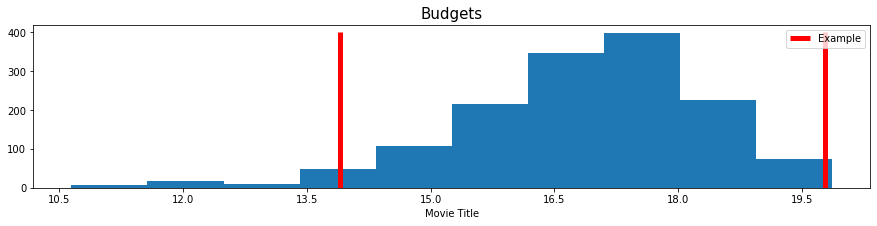

In [22]:
fig, ax = plt.subplots(figsize=(15,3))

frame = production_budget[production_budget.production_budget > 0]
frame['logged_budget'] = np.log(frame.production_budget)
ax.hist(frame.logged_budget)
upper_thresh = frame.logged_budget.mean() + frame.logged_budget.std() * 2
lower_thresh = frame.logged_budget.mean() - frame.logged_budget.std() * 2
ax.vlines(lower_thresh, ymin=0, ymax=400, lw=5, color='red')
ax.vlines(upper_thresh, ymin=0, ymax=400, lw=5, color='red')

# Add labels for x and y axes
ax.set_xlabel('Movie Title')


# Add a title for the plot
ax.set_title('Budgets', fontsize=15)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# add a legend 
ax.legend(["Example"], loc=1);

In [27]:
budget_frame = frame[(frame.logged_budget > lower_thresh) & (frame.logged_budget < upper_thresh)]
budget_frame

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count,logged_budget
2227,The Peanuts Movie,The Peanuts Movie offers a colorful gateway in...,"Noah Schnapp, Hadley Belle Miller, Alexander G...",20th Century Fox,Certified-Fresh,87.0,76.0,25,99000000,250091610,227973,11.344,2015-11-01,6.6,894,18.410630
229,Robin Hood,"Robin Hood robs from rich source material, but...","Taron Egerton, Eve Hewson, Jamie Foxx, Jamie D...",Summit Entertainment,Rotten,15.0,41.0,140,99000000,84747441,375588,39.975,2018-11-21,5.8,1194,18.410630
650,Alien: Covenant,Alien: Covenant delivers another satisfying ro...,"Michael Fassbender, Katherine Waterston, Billy...",20th Century Fox,Fresh,65.0,55.0,139,97000000,238521247,126889,24.651,2017-05-19,5.9,4971,18.390222
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,95000000,223050874,32657,26.691,2010-02-11,6.1,4229,18.369387
1821,Sex and the City 2,Straining under a thin plot stretched to its l...,"Sarah Jessica Parker, Kim Cattrall, Kristin Da...",Warner Bros. Pictures,Rotten,16.0,43.0,183,95000000,294680778,37786,9.986,2010-05-27,5.9,809,18.369387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,Dear White People,Dear White People adds a welcome new voice to ...,"Tyler James Williams, Tessa Thompson, Brandon ...",Roadside Attractions,Certified-Fresh,91.0,61.0,12,1250000,5403771,114750,7.455,2014-10-17,6.1,296,14.038654
982,Da Sweet Blood of Jesus,Da Sweet Blood of Jesus has no shortage of sty...,"Elvis Nolasco, Stephen Tyrone Williams, Zaraah...",Gravitas Ventures,Rotten,47.0,19.0,24,1250000,0,278316,2.607,2014-06-22,4.6,33,14.038654
312,Airborne,Airborne skates downhill with a threadbare sto...,"Shane McDermott, Seth Green, Brittney Powell, ...",Warner Bros.,Rotten,21.0,59.0,11,1200000,0,85207,2.877,2013-02-26,3.9,31,13.997832
1809,Saw,Saw ensnares audiences with a deceptively clev...,"Leigh Whannell, Cary Elwes, Danny Glover, Ken ...",Lions Gate Films,Rotten,49.0,84.0,93,1200000,103880027,176,19.127,2004-10-29,7.4,4795,13.997832


In [28]:
budget_frame[['production_budget', 'movie_title', 'actors']].sort_values(by='production_budget')

,production_budget,movie_title,actors
1170,1100000,The Fog,"Adrienne Barbeau, Hal Holbrook, Janet Leigh, J..."
1809,1200000,Saw,"Leigh Whannell, Cary Elwes, Danny Glover, Ken ..."
312,1200000,Airborne,"Shane McDermott, Seth Green, Brittney Powell, ..."
982,1250000,Da Sweet Blood of Jesus,"Elvis Nolasco, Stephen Tyrone Williams, Zaraah..."
1004,1250000,Dear White People,"Tyler James Williams, Tessa Thompson, Brandon ..."
...,...,...,...
2180,275000000,The Lone Ranger,"Johnny Depp, Armie Hammer, William Fichtner, T..."
1902,300000000,Spectre,"Daniel Craig, Christoph Waltz, Naomie Harris, ..."
1402,300000000,Justice League,"Ben Affleck, Henry Cavill, Amy Adams, Gal Gado..."
723,300000000,Avengers: Infinity War,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa..."
